In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.set_option('display.max_columns', None)

In [128]:
df = pd.read_csv('train.csv')

In [129]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [130]:
df.shape

(74111, 29)

In [131]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [132]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [133]:
df.drop_duplicates(subset=['id'],inplace=True)

In [91]:
df.shape

(74111, 29)

In [92]:
df.dropna(subset=['bathrooms', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 'bedrooms', 'beds'], inplace=True)

In [123]:
test = df.drop(columns=['cleaning_fee'])

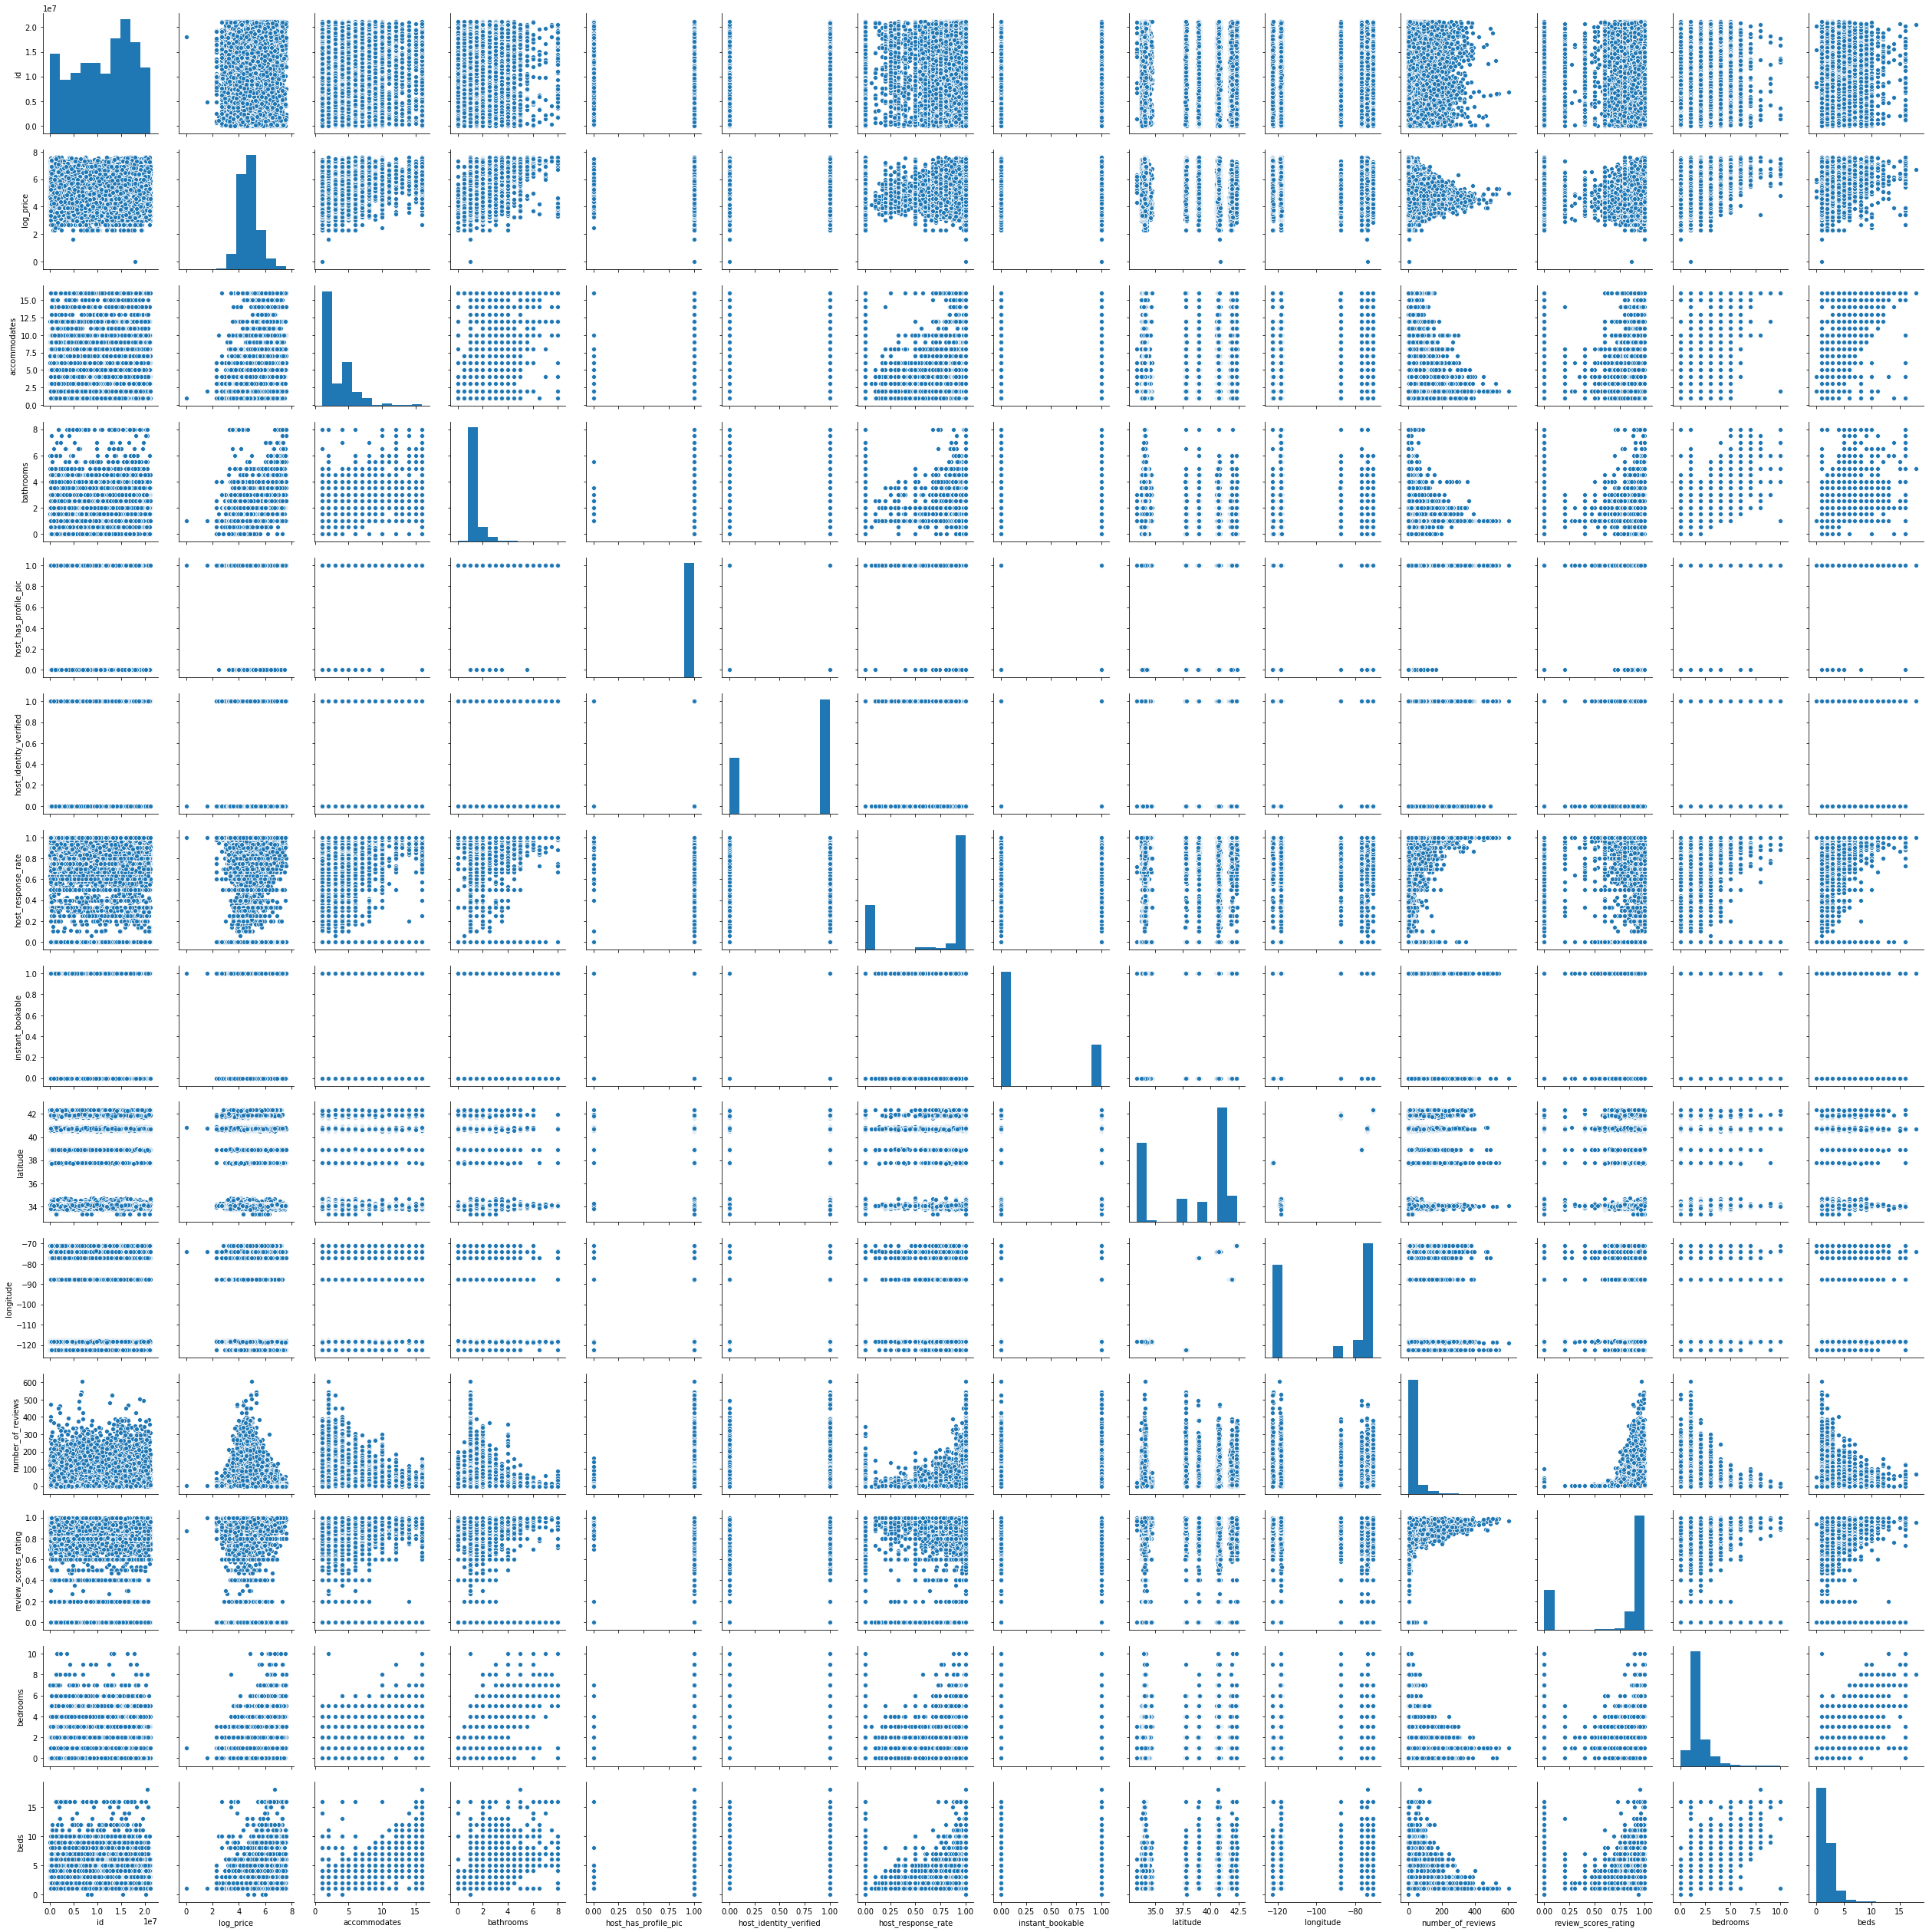

In [124]:
sns.pairplot(test)
plt.show()

In [93]:
df.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007413,-0.005761,-0.004144,-0.002915,-0.002971,-0.001434,0.003354,0.000733,-0.007941,-0.008863
log_price,-0.007413,1.000000,0.568098,0.355671,0.111367,-0.002191,-0.047708,-0.032019,0.090497,0.473524,0.442349
accommodates,-0.005761,0.568098,1.000000,0.505900,0.182041,-0.078078,-0.084864,0.042423,-0.018064,0.709689,0.810810
bathrooms,-0.004144,0.355671,0.505900,1.000000,0.053897,-0.137744,-0.134747,-0.041417,0.010711,0.590047,0.525580
cleaning_fee,-0.002915,0.111367,0.182041,0.053897,1.000000,-0.060930,-0.068541,0.110320,0.034370,0.105241,0.131807
latitude,-0.002971,-0.002191,-0.078078,-0.137744,-0.060930,1.000000,0.895806,-0.017632,-0.032463,-0.058890,-0.080169
longitude,-0.001434,-0.047708,-0.084864,-0.134747,-0.068541,0.895806,1.000000,-0.050239,-0.048390,-0.075935,-0.082005
number_of_reviews,0.003354,-0.032019,0.042423,-0.041417,0.110320,-0.017632,-0.050239,1.000000,0.011659,-0.034891,0.031909
review_scores_rating,0.000733,0.090497,-0.018064,0.010711,0.034370,-0.032463,-0.048390,0.011659,1.000000,0.010633,-0.027702
bedrooms,-0.007941,0.473524,0.709689,0.590047,0.105241,-0.058890,-0.075935,-0.034891,0.010633,1.000000,0.709536


In [94]:
dependent = df.log_price

((array([-4.27820309, -4.07642737, -3.96656968, ...,  3.96656968,
          4.07642737,  4.27820309]),
  array([0.        , 1.60943791, 2.30258509, ..., 7.60040233, 7.60040233,
         7.60040233])),
 (0.7121227598044215, 4.782890064910701, 0.9918500125826009))

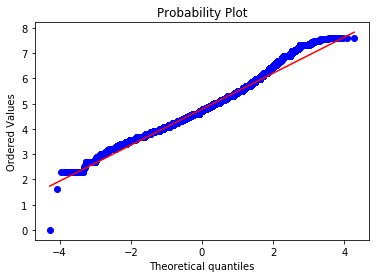

In [161]:
scipy.stats.probplot(dependent, plot=plt)

In [95]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [155]:
amenities = []
for amenity in df.amenities:
    amenity = amenity[1:-1].replace('"', '').split(',')
    for a in amenity:
        if a not in amenities:
            amenities.append(a)
print(len(amenities),sorted(amenities))

131 ['', ' smooth pathway to front door', '24-hour check-in', 'Accessible-height bed', 'Accessible-height toilet', 'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath', 'Baby monitor', 'Babysitter recommendations', 'Bath towel', 'Bathtub', 'Bathtub with shower chair', 'Beach essentials', 'Beachfront', 'Bed linens', 'Body soap', 'Breakfast', 'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector', 'Cat(s)', 'Changing table', 'Children’s books and toys', 'Children’s dinnerware', 'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib', 'Disabled parking spot', 'Dishes and silverware', 'Dishwasher', 'Dog(s)', 'Doorman', 'Doorman Entry', 'Dryer', 'EV charger', 'Elevator', 'Elevator in building', 'Essentials', 'Ethernet connection', 'Extra pillows and blankets', 'Family/kid friendly', 'Fire extinguisher', 'Fireplace guards', 'Firm matress', 'Firm mattress', 'First aid kit', 'Fixed grab bars for shower & toilet', 'Flat', 'Flat smooth pathway to front door', 'Fr

In [190]:
df['host_response_rate'] = df['host_response_rate'].str.strip('%').astype('float')/100

In [191]:
df.review_scores_rating = df.review_scores_rating/100

In [192]:
df['host_response_rate'].fillna(value=0.0, inplace=True)
df['review_scores_rating'].fillna(value=0.0, inplace=True)

In [193]:
df.replace({'t':1, 'f': 0}, inplace=True)

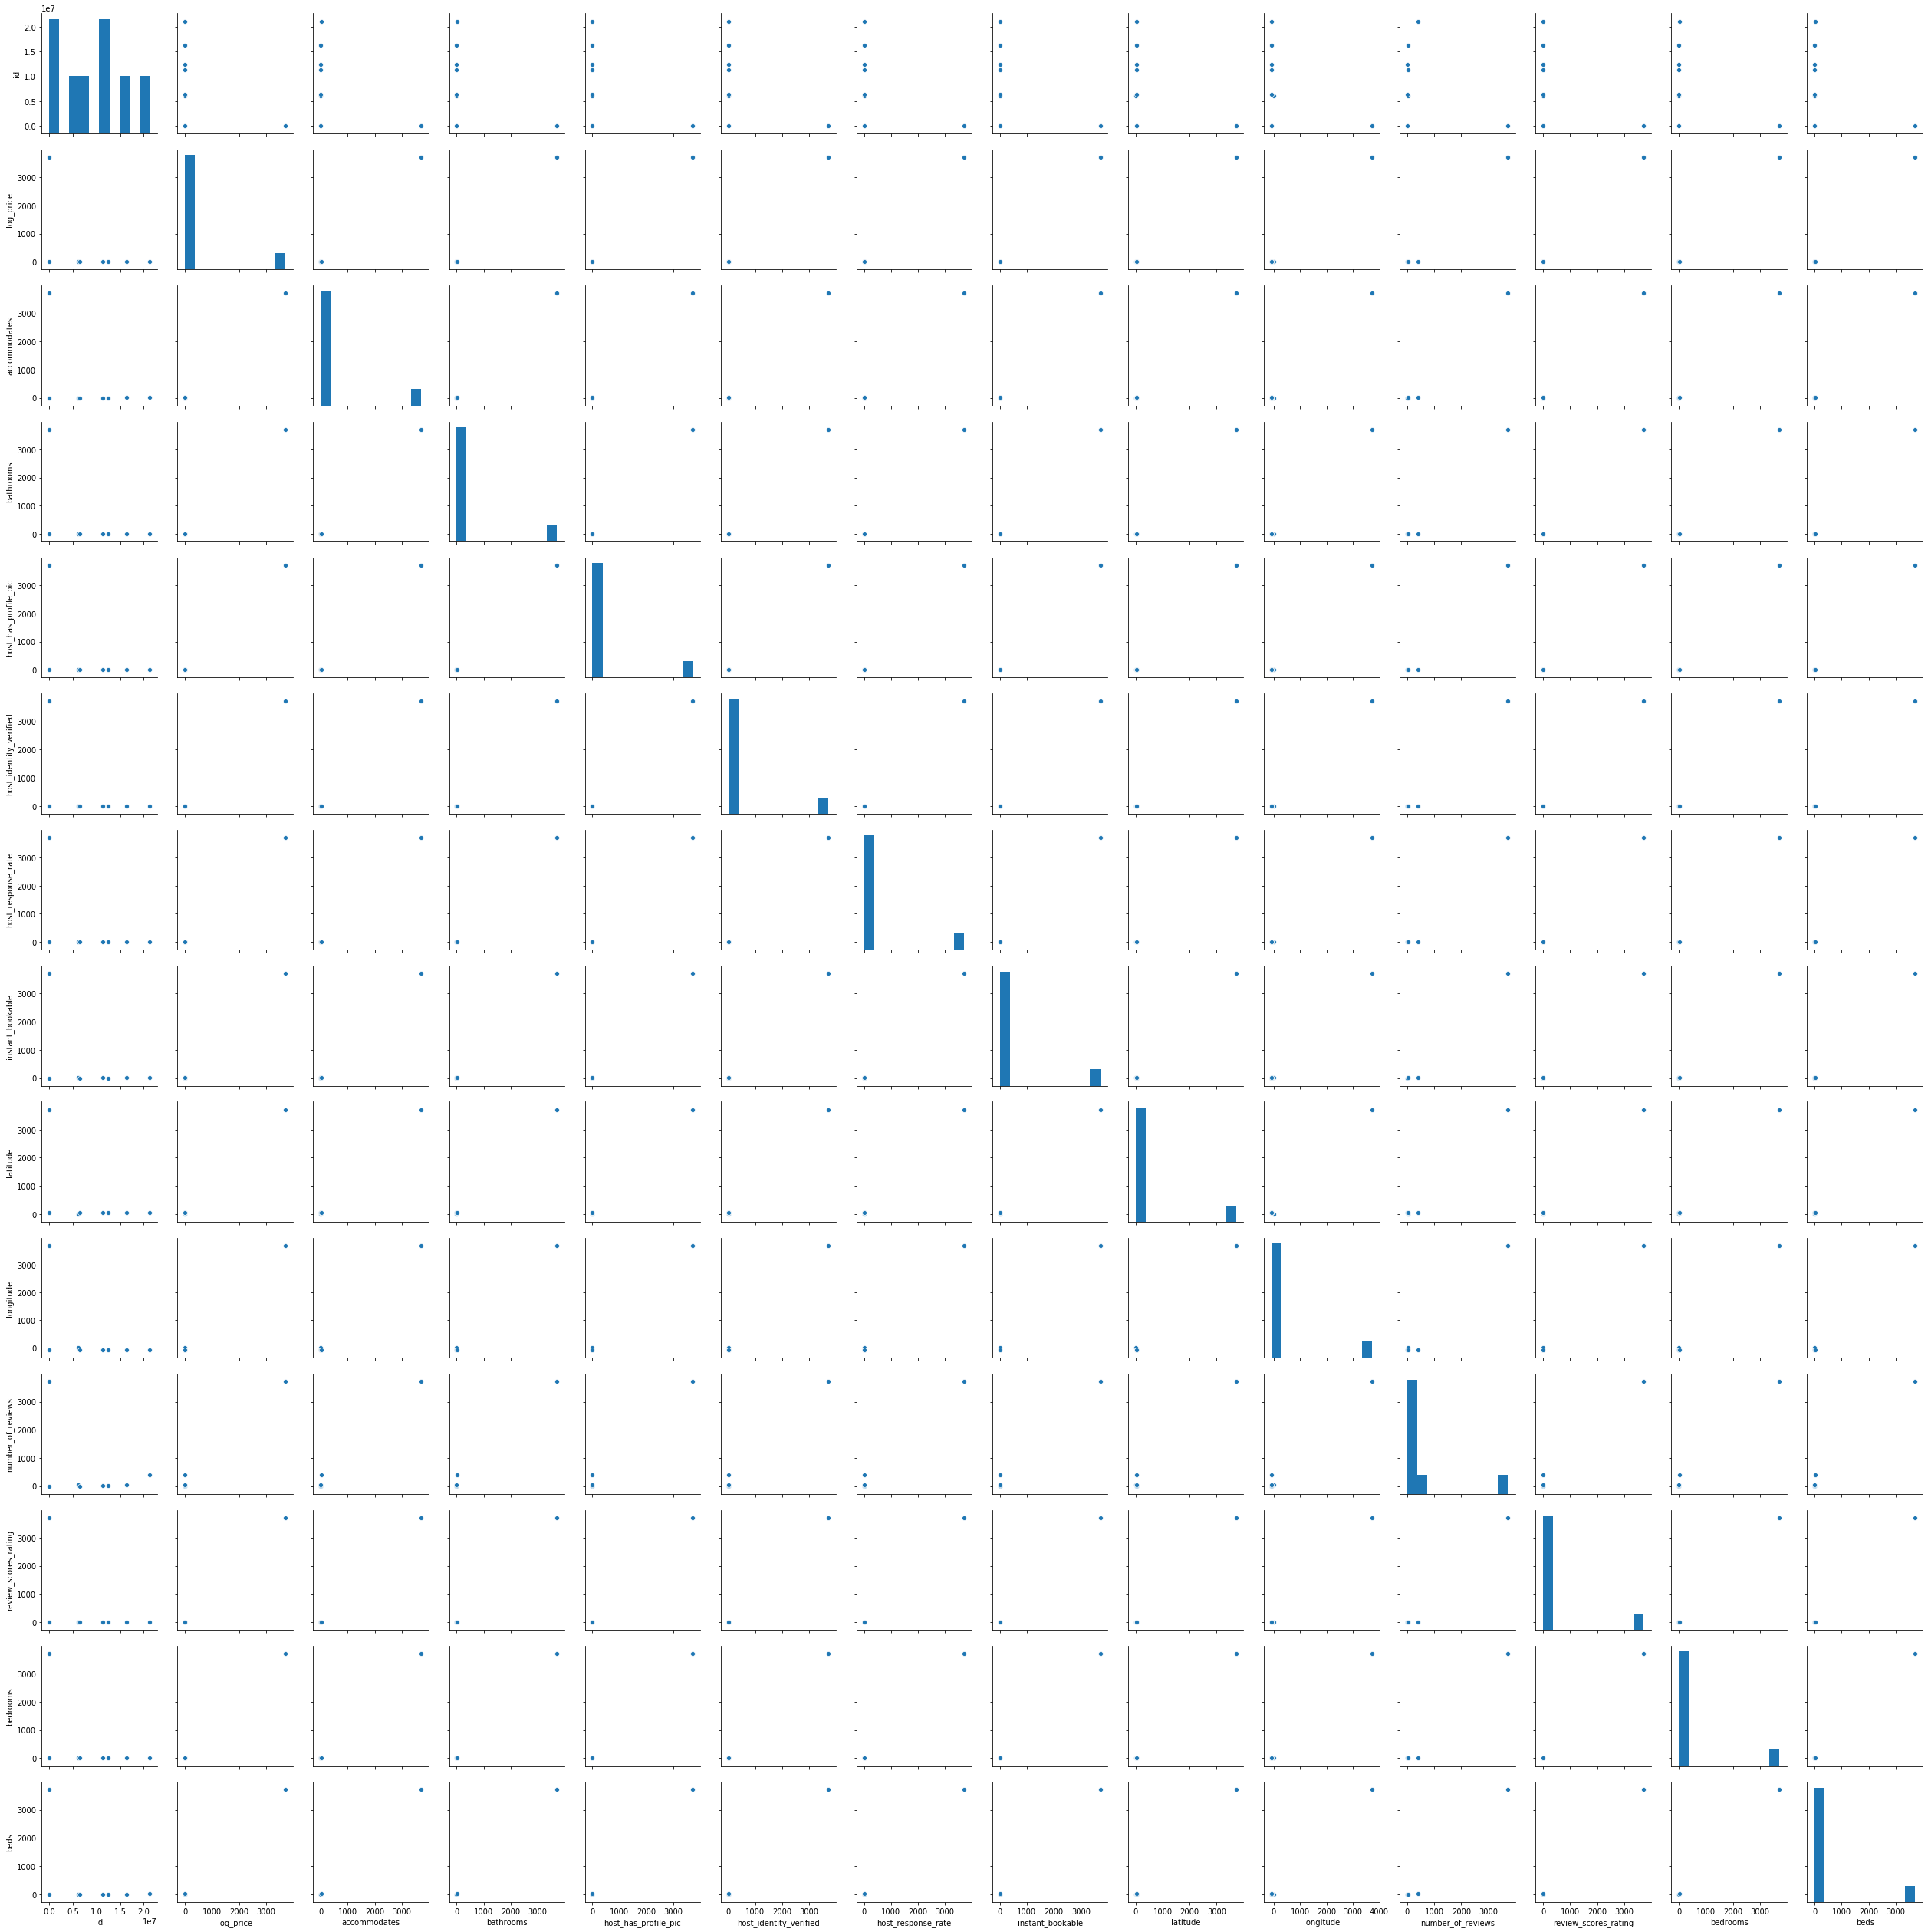

In [122]:
sns.pairplot(df[df['city'] == 'Chicago'].describe())
plt.show()

In [144]:
df[df['amenities'].str[2:-2].replace('"', '').split(',') == "Bathtu"]

AttributeError: 'Series' object has no attribute 'split'

In [138]:
print('Bathtu\'')

Bathtu'


In [151]:
df.amenities[98]

'{"Wireless Internet",Kitchen,Breakfast,Elevator,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector",Essentials,Hangers,"Hair dryer","Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance",Bathtub}'

In [152]:
amenities = []
i = 0
for amenity in df.amenities:
    amenity = amenity[2:-1].replace('"', '').split(',')
    i+=1
    for a in amenity:
        if a == 'Bathtu':
            print(i)
sorted(amenities)

[]

In [175]:
X_numeric = df.select_dtypes(exclude='object')

In [177]:
columns = list(X_numeric.columns)
formula = 'log_price ~ ' + '+'.join(columns)
formula

'log_price ~ id+log_price+accommodates+bathrooms+cleaning_fee+latitude+longitude+number_of_reviews+review_scores_rating+bedrooms+beds'

In [185]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [186]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [202]:
X = df.drop(columns=['id', 'property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review',
                   'host_since', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'], axis=1)

In [203]:
X.head()

,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,3,1.0,1.0,1.0,0.0,0,40.696524,-73.991617,2,1.00,1.0,1.0
1,5.129899,7,1.0,1.0,0.0,1.0,1,40.766115,-73.989040,6,0.93,3.0,3.0
2,4.976734,5,1.0,1.0,1.0,1.0,1,40.808110,-73.943756,10,0.92,1.0,3.0
3,6.620073,4,1.0,1.0,1.0,0.0,0,37.772004,-122.431619,0,0.00,2.0,2.0
4,4.744932,2,1.0,1.0,1.0,1.0,1,38.925627,-77.034596,4,0.40,0.0,1.0


In [204]:

# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

columns = list(X.columns)

# build the formula 
f = 'log_price ~ ' + '+'.join(columns)
# create a fitted model in one line
model = smf.ols(formula=f, data=X).fit()

In [205]:
from sklearn.linear_model import LinearRegression
# Let's rejoin our categorical and numerical columns
# then fit our model again.
y = X.log_price
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


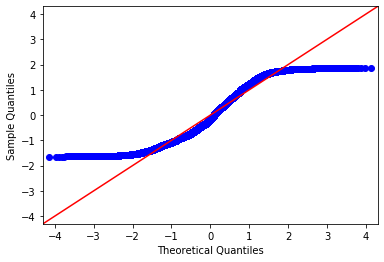

In [182]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()